## Assignemnt #1 - find genes with differential gene expression patterns. 

We want to find the genes that have statistically significant patterns of their gene expression levels. 

Define a measure that captures the idea of spatially varying gene expression. Think about it, there are many ways to do that. 

Hint: If expression pattern is uniform, what do you expect from two cells that are neighbors compared to cells that are not? 

Repeat your analysis taking into account cell types 


### Useful tool - KNN distances

to find if expression patterns are local you need to know which cells are the neighbors of a given cell. 
We do that with sklean package (k nearest neighbors)

In [6]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
np.random.seed(0)

mu, sigma = 10, 5
xy = np.random.normal(mu, sigma, (100, 2))


k = 5  # or any other number you prefer
nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(xy)
distances, indices = nbrs.kneighbors(xy)

In [2]:
distances

array([[0.        , 0.10031233, 0.17354638, 0.33683095, 0.42193949],
       [0.        , 0.22299133, 0.26091184, 0.35778274, 0.61538469],
       [0.        , 1.76534673, 2.27033892, 2.37712608, 2.43643506],
       ...,
       [0.        , 0.02609462, 0.34825978, 0.38385796, 0.43303073],
       [0.        , 0.18071092, 0.69765965, 0.80616595, 0.93103888],
       [0.        , 0.20569891, 0.30451583, 0.32036085, 0.51223411]])

In [3]:
indices

array([[  0, 788, 226, 965, 336],
       [  1, 959, 614, 445, 444],
       [  2, 204, 494, 412, 746],
       ...,
       [997,  38, 953, 549, 214],
       [998, 403, 282, 831, 185],
       [999, 773, 754, 938, 118]])

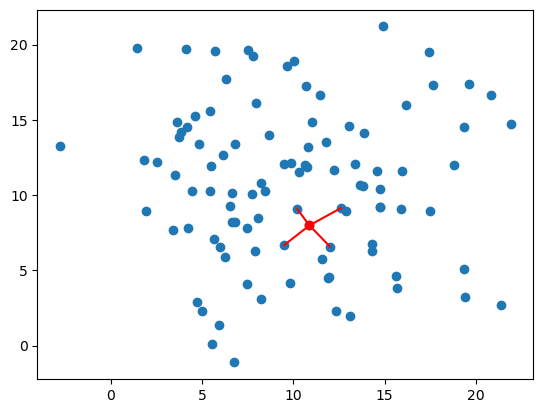

In [9]:
import matplotlib.pyplot as plt

focal_points=32

plt.scatter(xy[:, 0], xy[:, 1])
plt.scatter(xy[focal_points, 0], xy[focal_points, 1], color='red')

for i in indices[focal_points]:
    plt.plot([xy[focal_points, 0], xy[i, 0]], [xy[focal_points, 1], xy[i, 1]], 'r-')

plt.show()
